In [21]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('../data/주택실거래가정보.csv', encoding='cp949')

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\297954631.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/주택실거래가정보.csv', encoding='cp949')


In [24]:
df['시군구명'].nunique()

88

In [25]:
df=df.loc[:,['시군구명','전용면적','층','건축년도','거래금액']]

In [ ]:
df

In [37]:
df.dropna(inplace=True)

In [38]:
y=df['거래금액']

In [39]:
X=df.drop(columns='거래금액')

In [ ]:
df

In [40]:
numerical=['전용면적','층','건축년도']

In [41]:
categorical=['시군구명']

In [42]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()

In [43]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [44]:
labe_encoder=OrdinalEncoder()
onehot_encoder=OneHotEncoder()

In [45]:
from sklearn.compose import ColumnTransformer

In [46]:
onehot_colums=['시군구명']

In [47]:
numeric_columns=['전용면적','층','건축년도']

In [48]:
preprocessor=ColumnTransformer([
    ('num',imputer,numeric_columns),
    ('onehot',onehot_encoder,onehot_colums)
])

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
regressor=RandomForestRegressor(random_state=47)

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('modeling',regressor)])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['전용면적', '층', '건축년도']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['시군구명'])])),
                ('modeling', RandomForestRegressor(random_state=47))])

In [56]:
y_pred=pipeline.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error,r2_score

In [58]:
mean_absolute_error(y_test,y_pred)

4136.314366074701

In [59]:
r2_score(y_test,y_pred)

0.9430585981115047

In [60]:
df_y=y_test.to_frame()

In [61]:
df_y['pred']=y_pred

In [62]:
df_y.reset_index(drop=True,inplace=True)

c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


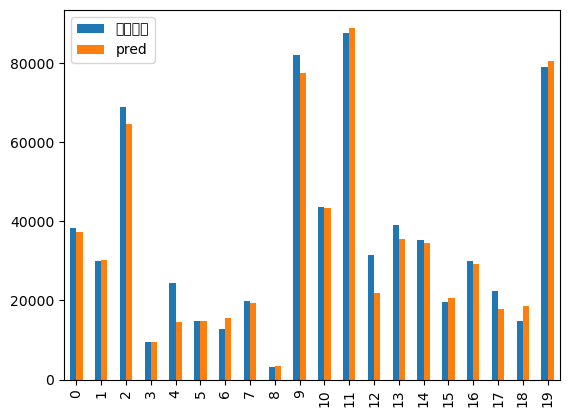

In [63]:
df_y.loc[0:19].plot(kind='bar')
plt.show()

In [ ]:
df_y.loc[0:19,:].plot(kind='bar')
plt.show()

In [ ]:
df.head(2)

In [61]:
import numpy as np
new_data = np.array([['경기도성남시분당구', 60, 9,2020]])

In [62]:
new_data_df = pd.DataFrame(new_data, columns=['시군구명','전용면적','층','건축년도'])

In [ ]:
new_data.reshape(1,-1)

In [ ]:
pipeline.predict(new_data_df)

In [65]:
import joblib

In [ ]:
joblib.dump(pipeline,'pipeline.pkl')

In [ ]:
sorted(df['시군구명'].unique())